# Linear Regression: Salary
##### y = mx + b
##### where m = slope & b = y-intercept

###### slope, coefficient = kaltevuuskulma, kerroin
###### intercept = nollakohta
###### scatterplot = hajontakuvio, sirontakuvio

###### Mean Absolute Error (MAE) = keski-itseisvirhe, keskiarvoinen absoluuttinen virhe
###### Mean Squared Error (MSE) = keskimääräinen neliövirhe
###### R² score = determinaatiokerroin (a statistical measure used to assess the goodness of fit of a regression model)

In [71]:
import numpy as np # For random data generation
import pandas as pd # For DataFraming
import matplotlib.pyplot as plt # For graphing
import seaborn as sns # For graphing

from sklearn.linear_model import LinearRegression # For linear regression modeling
from sklearn.model_selection import train_test_split # For data splitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Create dataset

In [72]:
# Reseed the singleton RandomState instance
np.random.seed(42)

# Number of samples
num_samples = 500
# Create 500 random integers from 2 (inc.) to 21 (exc.)
years_of_experience = np.random.randint(2, 21, size = num_samples)

slope = (200_000 - 60_000) / 18
intercept = 60_000
# Create random salaries
salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000, size = num_samples) # Draw random samples from a normal (Gaussian) distribution

# Create a DataFrame with the random data
data = {"years-of-experience": years_of_experience, "salary": salaries}
df = pd.DataFrame(data)

# Show different stats based on the data
df.describe()

,years-of-experience,salary
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


### Create a scatterplot with a regression line

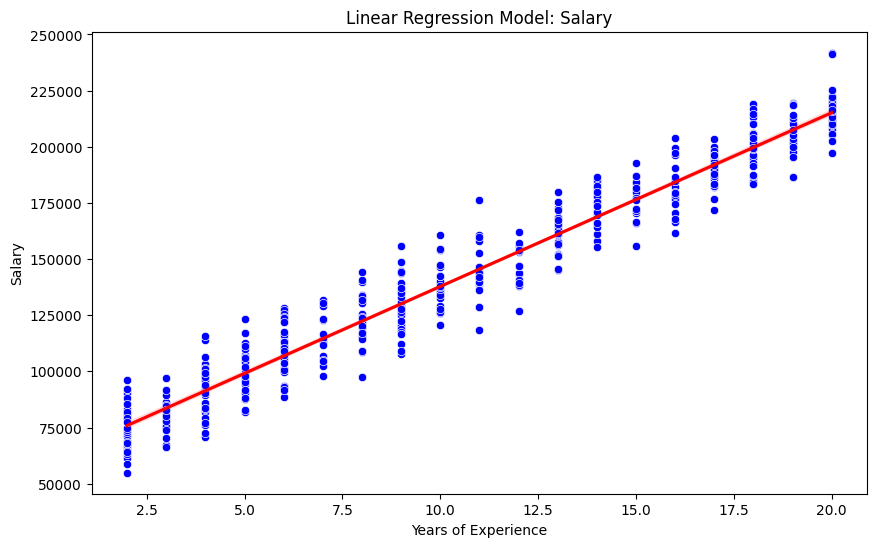

In [73]:
# Create a figure (a top-level container that holds all the elements of a plot)
plt.figure(figsize = (10, 6))

# Create a scatterplot and regression line
sns.scatterplot(x = "years-of-experience", y = "salary", data = df, color = "blue")
sns.regplot(x = "years-of-experience", y = "salary", data = df, scatter = False, color = "red")

# Set the plot title and labels
plt.title("Linear Regression Model: Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

### Data splitting

In [74]:
X = df[["years-of-experience"]]
y = df["salary"]

# Do an 80/20 train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

### Linear Regression

In [75]:
# Build a linear regression
lr = LinearRegression()

# Fit the training dataset to the linear regression
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
# Show the quality of the training fit
lr.score(X_train, y_train)

0.951939494296042

In [77]:
# Show the quality of the testing fit
lr.score(X_test, y_test)

0.9432422887509949

In [78]:
# Make a y-prediction with X_test
y_pred = lr.predict(X_test)

In [79]:
# Mean Absolute Error (MAE) is the absolute difference between the predicted values and actual values
mean_absolute_error(y_test, y_pred)

7858.36752668246

In [80]:
# Mean Squared Error (MSE) is the average of the squared differences between the predicted values and actual values
mean_squared_error(y_test, y_pred)

90605101.64484806

In [81]:
# R² score is the coefficient of determination
# (the fit of the regression model compared to your data)
r2_score(y_test, y_pred)

0.9432422887509949

In [82]:
# How much a year of experience increases an employee's salary on average?
# m in the equation y = mx + b
lr.coef_

array([7781.55910389])

In [83]:
# How much is an employee's salary with 0 years of experience?
# b in the equation y = mx + b
lr.intercept_

np.float64(60161.07503151051)

### Plot the coefficients and intercept

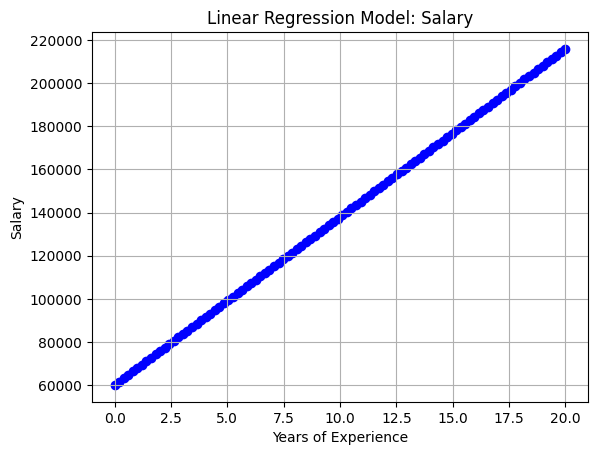

In [84]:
coefficients = lr.coef_
intercept = lr.intercept_

X = np.linspace(0, 20, 100) # Create 100 evenly spaced numbers from 0 to 20
y = coefficients * X + intercept

# Create a scatter plot
plt.scatter(X, y, label = f"y = {coefficients[0]}x + {intercept}", color = "blue")

# Set the plot title and labels
plt.title("Linear Regression Model: Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.grid() # Configure grid lines
plt.show()